In [122]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chromedriver_path =  "C:/Users/nguye/Desktop/chromedriver-win32/chromedriver.exe"

In [3]:
driver = webdriver.Chrome()

In [4]:
sources = []
destinations = []
print("Please enter -1 when done.")
print("-"*10)
while True:
    sources.append(input("From which city?\n"))
    if "-1" in sources: 
        sources.pop(-1)
        break
    destinations.append(input("Where to?\n"))
    if "-1" in destinations: 
        sources.pop(-1)
        destinations.pop(-1)
        break
    print("-"*10)

print("\nRoutes:")
for i in range(len(sources)):
    print(f"{sources[i]} => {destinations[i]}")

Please enter -1 when done.
----------


From which city?
 SGN
Where to?
 DAD


----------


From which city?
 -1



Routes:
SGN => DAD


In [5]:
# get user input for period (start and end date)
start_date = np.datetime64(input('Start Date, Please use YYYY-MM-DD format only '))
end_date = np.datetime64(input('End Date, Please use YYYY-MM-DD format only '))
days = end_date - start_date
num_days = days.item().days

Start Date, Please use YYYY-MM-DD format only  2024-04-09
End Date, Please use YYYY-MM-DD format only  2024-06-09


In [6]:
def get_airlines(soup):
    airline = []
    airlines = soup.find_all('div',class_='J0g6-operator-text',string=True)
    for i in airlines:
        airline.append(i.text)
    return airline
    
def get_total_stops(soup):
    stops_list = []
    stops = soup.find_all('div',class_='vmXl vmXl-mod-variant-default')

    for i in stops:
        for j in i.find_all('span',class_='JWEO-stops-text'):
               stops_list.append(j.text)
    return stops_list

def get_price(soup):
    prices = []
    price = soup.find_all('div',class_='oVHK')

    for i in price:
        for j in i.find_all('div', class_='f8F1-price-text'):
            prices.append(j.text)
    return prices

def get_duration(soup):
    duration_list = []
    duration = soup.find_all('div' , class_='xdW8 xdW8-mod-full-airport')
    for i in duration:
        for j in i.find_all('div',class_='vmXl vmXl-mod-variant-default'):
            duration_list.append(j.text)
    return duration_list
    
def get_times(soup):
    flighttime = []
    flighttimes = soup.find_all('div' , class_='vmXl vmXl-mod-variant-large')
    for i in flighttimes:
        flighttime.append(i.text)
    return flighttime
        

In [7]:
for i in range(len(sources)):
    column_names = ["Airline", "Source", "Destination","Duration" ,"Total Stop", "Price","Date", "Flight Time"]
    df = pd.DataFrame(columns = column_names)
    for j in tqdm(range(num_days+1)):
        
        # close and open driver every 10 days to avoid captcha
        if j % 10 == 0:
            driver.quit()
            driver = webdriver.Chrome()#, chrome_options=chromeOptions)
            
        url = f"https://www.vn.kayak.com/flights/{sources[i]}-{destinations[i]}/{start_date+j}"
        driver.get(url)
        sleep(15)
        
        # click show more button to get all flights
        try:
            show_more_button = driver.find_element_by_xpath('//*[@id="DC5E"]/div/div"]')
        except:
            
            # in case a captcha appears, require input from user so that the for loop pauses and the user can continue the
            # loop after solving the captcha
            input("Please solve the captcha then enter anything here to resume scraping.")
            
        while True:
            try:
                show_more_button.click()
                driver.implicitly_wait(10)
            except:
                break
    
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        airlines = get_airlines(soup)
        stops = get_total_stops(soup)
        prices = get_price(soup)
        duration = get_duration(soup)
        flightimes = get_times(soup)
        
        df = pd.concat([df, pd.DataFrame({
            'Airline': airlines,
            'Duration': duration,
            'Total Stop' : stops,
            'Price' : prices,
            'Flight Time': flightimes,
            'Date' : start_date+j
            
                                    })])
        
    df['Source'] = sources[i]
    df['Destination'] = destinations[i]
    df = df.replace('\n','', regex=True)
    df = df.reset_index(drop = True)
    
    # save data as csv file for each route
    df.to_csv(f'{sources[i]}_{destinations[i]}.csv',index=False)
    print(f"Succesfully saved {sources[i]} => {destinations[i]} route as {sources[i]}_{destinations[i]}.csv ")
    
driver.quit()

  0%|                                                                                                                                                                                    | 0/62 [00:00<?, ?it/s]

Please solve the captcha then enter anything here to resume scraping. d


C:\Users\nguye\AppData\Local\Temp\ipykernel_1132\2668278435.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({
  2%|██▋                                                                                                                                                                       | 1/62 [01:33<1:34:53, 93.34s/it]

Please solve the captcha then enter anything here to resume scraping. d


  3%|█████▌                                                                                                                                                                      | 2/62 [01:51<48:56, 48.94s/it]

Please solve the captcha then enter anything here to resume scraping. k


  5%|████████▎                                                                                                                                                                   | 3/62 [02:12<35:38, 36.25s/it]

Please solve the captcha then enter anything here to resume scraping. v


  6%|███████████                                                                                                                                                                 | 4/62 [02:34<29:47, 30.82s/it]

Please solve the captcha then enter anything here to resume scraping. f


  8%|█████████████▊                                                                                                                                                              | 5/62 [02:53<25:07, 26.45s/it]

Please solve the captcha then enter anything here to resume scraping. l


 10%|████████████████▋                                                                                                                                                           | 6/62 [03:11<21:51, 23.43s/it]

Please solve the captcha then enter anything here to resume scraping. k


 11%|███████████████████▍                                                                                                                                                        | 7/62 [03:29<19:51, 21.66s/it]

Please solve the captcha then enter anything here to resume scraping. k


 13%|██████████████████████▏                                                                                                                                                     | 8/62 [03:47<18:37, 20.70s/it]

Please solve the captcha then enter anything here to resume scraping. k


 15%|████████████████████████▉                                                                                                                                                   | 9/62 [04:05<17:35, 19.92s/it]

Please solve the captcha then enter anything here to resume scraping. k


 16%|███████████████████████████▌                                                                                                                                               | 10/62 [04:23<16:38, 19.21s/it]

Please solve the captcha then enter anything here to resume scraping. k


 18%|██████████████████████████████▎                                                                                                                                            | 11/62 [04:54<19:16, 22.68s/it]

Please solve the captcha then enter anything here to resume scraping. m


 19%|█████████████████████████████████                                                                                                                                          | 12/62 [05:17<18:58, 22.78s/it]

Please solve the captcha then enter anything here to resume scraping. m


 21%|███████████████████████████████████▊                                                                                                                                       | 13/62 [05:36<17:44, 21.72s/it]

Please solve the captcha then enter anything here to resume scraping. m


 23%|██████████████████████████████████████▌                                                                                                                                    | 14/62 [06:19<22:35, 28.24s/it]

Please solve the captcha then enter anything here to resume scraping. n


 24%|█████████████████████████████████████████▎                                                                                                                                 | 15/62 [06:55<23:47, 30.38s/it]

Please solve the captcha then enter anything here to resume scraping. n


 26%|████████████████████████████████████████████▏                                                                                                                              | 16/62 [07:12<20:18, 26.48s/it]

Please solve the captcha then enter anything here to resume scraping. k


 27%|██████████████████████████████████████████████▉                                                                                                                            | 17/62 [07:40<20:13, 26.96s/it]

Please solve the captcha then enter anything here to resume scraping. l


 29%|█████████████████████████████████████████████████▋                                                                                                                         | 18/62 [07:59<18:03, 24.63s/it]

Please solve the captcha then enter anything here to resume scraping. d


 31%|████████████████████████████████████████████████████▍                                                                                                                      | 19/62 [08:21<17:02, 23.78s/it]

Please solve the captcha then enter anything here to resume scraping. d


 32%|███████████████████████████████████████████████████████▏                                                                                                                   | 20/62 [08:39<15:21, 21.94s/it]

Please solve the captcha then enter anything here to resume scraping. k


 34%|█████████████████████████████████████████████████████████▉                                                                                                                 | 21/62 [09:08<16:26, 24.06s/it]

Please solve the captcha then enter anything here to resume scraping. j


 35%|████████████████████████████████████████████████████████████▋                                                                                                              | 22/62 [09:32<16:07, 24.20s/it]

Please solve the captcha then enter anything here to resume scraping. j


 37%|███████████████████████████████████████████████████████████████▍                                                                                                           | 23/62 [09:58<16:03, 24.69s/it]

Please solve the captcha then enter anything here to resume scraping. j


 39%|██████████████████████████████████████████████████████████████████▏                                                                                                        | 24/62 [10:17<14:35, 23.04s/it]

Please solve the captcha then enter anything here to resume scraping. d


 40%|████████████████████████████████████████████████████████████████████▉                                                                                                      | 25/62 [10:35<13:16, 21.51s/it]

Please solve the captcha then enter anything here to resume scraping. l


 42%|███████████████████████████████████████████████████████████████████████▋                                                                                                   | 26/62 [10:53<12:11, 20.31s/it]

Please solve the captcha then enter anything here to resume scraping. h


 44%|██████████████████████████████████████████████████████████████████████████▍                                                                                                | 27/62 [11:11<11:28, 19.66s/it]

Please solve the captcha then enter anything here to resume scraping. j


 45%|█████████████████████████████████████████████████████████████████████████████▏                                                                                             | 28/62 [11:29<10:49, 19.09s/it]

Please solve the captcha then enter anything here to resume scraping. j


 47%|███████████████████████████████████████████████████████████████████████████████▉                                                                                           | 29/62 [11:47<10:22, 18.85s/it]

Please solve the captcha then enter anything here to resume scraping. l


 48%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 30/62 [12:12<11:07, 20.86s/it]

Please solve the captcha then enter anything here to resume scraping. k


 50%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 31/62 [12:40<11:46, 22.78s/it]

Please solve the captcha then enter anything here to resume scraping. m


 52%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 32/62 [13:00<11:03, 22.11s/it]

Please solve the captcha then enter anything here to resume scraping. j


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                | 33/62 [13:18<10:05, 20.89s/it]

Please solve the captcha then enter anything here to resume scraping. k


 55%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 34/62 [13:38<09:36, 20.59s/it]

Please solve the captcha then enter anything here to resume scraping. f


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 35/62 [22:08<1:15:20, 167.44s/it]

Please solve the captcha then enter anything here to resume scraping. d


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 36/62 [24:16<1:07:23, 155.53s/it]

Please solve the captcha then enter anything here to resume scraping. d


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 37/62 [24:34<47:37, 114.29s/it]

Please solve the captcha then enter anything here to resume scraping. k


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 38/62 [24:52<34:11, 85.48s/it]

Please solve the captcha then enter anything here to resume scraping. f


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 39/62 [25:10<25:00, 65.23s/it]

Please solve the captcha then enter anything here to resume scraping. l


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 40/62 [25:45<20:29, 55.90s/it]

Please solve the captcha then enter anything here to resume scraping. f


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 41/62 [26:13<16:41, 47.67s/it]

Please solve the captcha then enter anything here to resume scraping. d


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 42/62 [26:31<12:57, 38.86s/it]

Please solve the captcha then enter anything here to resume scraping. f


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 43/62 [26:49<10:19, 32.58s/it]

Please solve the captcha then enter anything here to resume scraping. k


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 44/62 [27:08<08:31, 28.41s/it]

Please solve the captcha then enter anything here to resume scraping. s


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 45/62 [27:52<09:23, 33.16s/it]

Please solve the captcha then enter anything here to resume scraping. 


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 46/62 [30:26<18:28, 69.31s/it]

Please solve the captcha then enter anything here to resume scraping. h


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 47/62 [30:45<13:32, 54.15s/it]

Please solve the captcha then enter anything here to resume scraping. j


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 48/62 [31:03<10:06, 43.33s/it]

Please solve the captcha then enter anything here to resume scraping. h


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 49/62 [31:22<07:49, 36.15s/it]

Please solve the captcha then enter anything here to resume scraping. k


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 50/62 [31:49<06:40, 33.36s/it]

Please solve the captcha then enter anything here to resume scraping. f


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 51/62 [33:43<10:34, 57.70s/it]

Please solve the captcha then enter anything here to resume scraping. d


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 52/62 [34:02<07:39, 45.96s/it]

Please solve the captcha then enter anything here to resume scraping. f


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 53/62 [34:30<06:03, 40.44s/it]

Please solve the captcha then enter anything here to resume scraping. f


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 54/62 [34:48<04:30, 33.85s/it]

Please solve the captcha then enter anything here to resume scraping. g


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 55/62 [35:06<03:23, 29.07s/it]

Please solve the captcha then enter anything here to resume scraping. d


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 56/62 [35:28<02:41, 26.99s/it]

Please solve the captcha then enter anything here to resume scraping. k


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 57/62 [36:45<03:30, 42.08s/it]

Please solve the captcha then enter anything here to resume scraping. h


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 58/62 [37:04<02:20, 35.08s/it]

Please solve the captcha then enter anything here to resume scraping. j


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 59/62 [37:25<01:32, 30.83s/it]

Please solve the captcha then enter anything here to resume scraping. l


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 60/62 [37:43<00:54, 27.02s/it]

Please solve the captcha then enter anything here to resume scraping. k


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 61/62 [38:10<00:26, 26.96s/it]

Please solve the captcha then enter anything here to resume scraping. k


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [38:39<00:00, 37.41s/it]


Succesfully saved SGN => DAD route as SGN_DAD.csv 


In [11]:
print(len(airlines))
print(len(duration))
print(len(prices))
print(len(sources))
print(len(destinations))
print(len(flightimes))

15
15
15
1
1
15


In [8]:
df.head()

,Airline,Source,Destination,Duration,Total Stop,Price,Date,Flight Time
0,Vietravel Airlines,SGN,DAD,1h 20m,bay thẳng,1.381.440 ₫,2024-04-09,20:55 – 22:15
1,VietJet Air,SGN,DAD,1h 15m,bay thẳng,1.097.330 ₫,2024-04-09,21:50 – 23:05
2,VietJet Air,SGN,DAD,1h 20m,bay thẳng,1.545.600 ₫,2024-04-09,20:50 – 22:10
3,Hãng Hàng không Quốc gia Việt Nam,SGN,DAD,1h 30m,bay thẳng,1.616.000 ₫,2024-04-09,22:15 – 23:45
4,Hãng Hàng không Quốc gia Việt Nam,SGN,DAD,1h 30m,bay thẳng,2.026.000 ₫,2024-04-09,18:00 – 19:30


In [ ]:
# Split the "Flight Time" column into "Departure Time" and "Arrival Time"
df[['Departure Time', 'Arrival Time']] = df['Flight Time'].str.split(' – ', expand=True)

# Drop the original "Flight Time" column 
df.drop(columns=['Flight Time'], inplace=True)


In [17]:
#Replace Airline name
df['Airline'] = df['Airline'].replace('Hãng Hàng không Quốc gia Việt Nam', 'Vietnam Airlines')

In [97]:
#convert Price into numeric values
df['Price'] = df['Price'].str.replace('.', '')  # Remove dots
df['Price'] = df['Price'].str.replace('₫', '')  # Remove currency symbol
df['Price'] = df['Price'].astype(int)

In [107]:
# Extract the day of the week from the 'Date' column (Monday=0, Sunday=6)
df['Day_of_week'] = df['Date'].dt.dayofweek

In [18]:
#List distinct airline 
distinct_airlines = df['Airline'].unique()
print("Distinct Airlines:")
for airline in distinct_airlines:
    print(airline)

Distinct Airlines:
Vietravel Airlines
VietJet Air
Vietnam Airlines
Vietravel Airlines, VietJet Air
Bamboo Airways
Hahn Air Systems
Korean Air
China Airlines


Airline
VietJet Air                        494
Vietnam Airlines                   204
Bamboo Airways                     129
Vietravel Airlines                  73
Hahn Air Systems                    17
Korean Air                           6
China Airlines                       3
Vietravel Airlines, VietJet Air      1
Name: count, dtype: int64


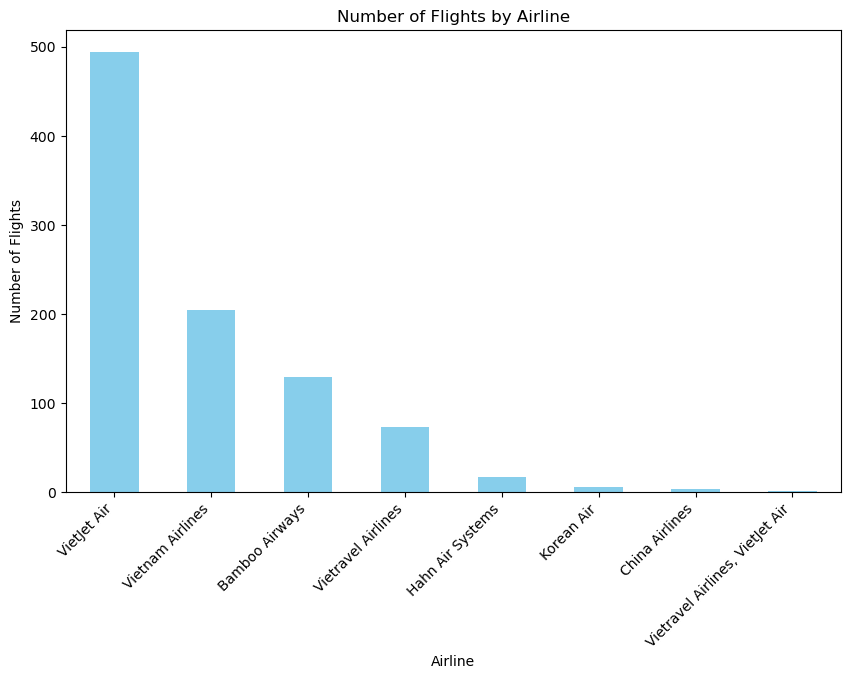

In [77]:
airline_counts = df['Airline'].value_counts()
print(airline_counts)
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
def transform_duration(duration):
    hours, minutes = duration.split('h ')
    total_hours = int(hours) + int(minutes[:-1]) / 60
    return round(total_hours, 2)
df['Duration (hours)'] = df['Duration'].apply(transform_duration)

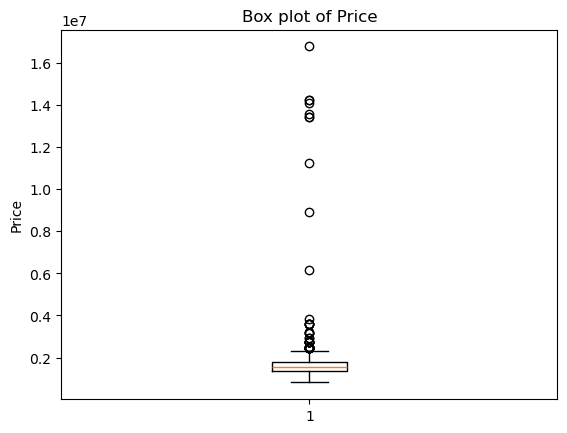

In [172]:
# Box plot of duration
plt.boxplot(df['Price'])
plt.title('Box plot of Price')
plt.ylabel('Price')
plt.show()

In [173]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
Q2 = df['Price'].quantile(0.5)
print(Q1,Q2,Q3)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Range of Outlier Duration Values:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

1346893.0 1545600.0 1771151.0
Range of Outlier Duration Values:
Lower Bound: 710506.0
Upper Bound: 2407538.0


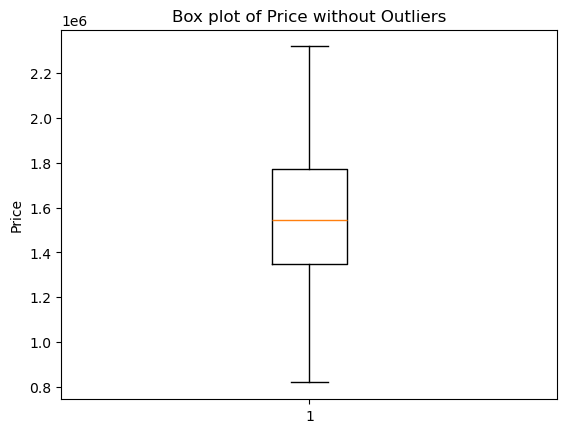

In [174]:
# Box plot of price without outliers
plt.boxplot(df['Price'], showfliers=False)
plt.title('Box plot of Price without Outliers')
plt.ylabel('Price')
plt.show()

In [93]:
# Calculate average duration for each airline
average_duration = df.groupby('Airline')['Duration (hours)'].mean().round(2)
print("Average Duration of Flights for Each Airline (in hours):")
print(average_duration)

Average Duration of Flights for Each Airline (in hours):
Airline
Bamboo Airways                      1.42
China Airlines                     18.08
Hahn Air Systems                    1.33
Korean Air                         13.20
VietJet Air                         1.33
Vietnam Airlines                    1.47
Vietravel Airlines                  1.34
Vietravel Airlines, VietJet Air     5.08
Name: Duration (hours), dtype: float64


Correlation between Price and Duration: 0.808758203109102


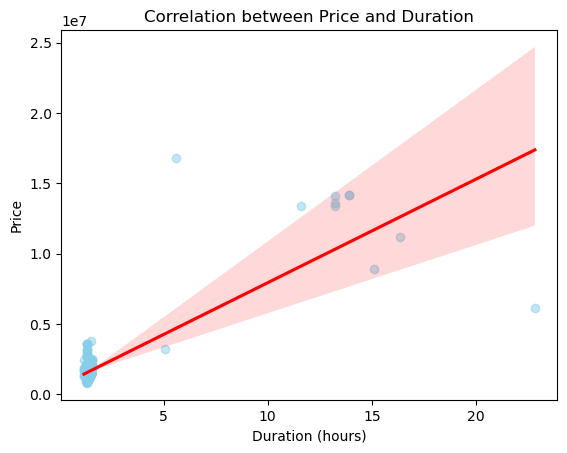

In [125]:
correlation = df['Price'].corr(df['Duration (hours)'])
print("Correlation between Price and Duration:", correlation)
#Scatter plot
sns.regplot(x='Duration (hours)', y='Price', data=df, scatter_kws={'color': 'skyblue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Price and Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()


In [104]:
# Calculate the average price by airline
average_price = df.groupby('Airline')['Price'].mean()
print("Average Price of Flights for Each Airline:")
for airline, price in average_price.items():
    print(f"{airline}: {price:,.0f} ₫")

Average Price of Flights for Each Airline:
Bamboo Airways: 1,556,643 ₫
China Airlines: 8,762,333 ₫
Hahn Air Systems: 3,084,400 ₫
Korean Air: 13,815,333 ₫
VietJet Air: 1,440,608 ₫
Vietnam Airlines: 1,921,324 ₫
Vietravel Airlines: 1,454,603 ₫
Vietravel Airlines, VietJet Air: 3,232,606 ₫


In [132]:
average_price_by_day = df.groupby('Day_of_week')['Price'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_price_by_day.index = [day_names[idx] for idx in average_price_by_day.index]
for day, price in average_price_by_day.items():
    print(f"{day}: {price:,.0f} ₫")

Monday: 1,595,072 ₫
Tuesday: 1,992,199 ₫
Wednesday: 1,410,887 ₫
Thursday: 1,562,602 ₫
Friday: 2,008,938 ₫
Saturday: 1,735,205 ₫
Sunday: 1,586,599 ₫


In [157]:
df.head()

,Airline,Source,Destination,Duration,Total Stop,Price,Date,Departure Time,Arrival Time,Duration (hours),Day_of_week
0,Vietravel Airlines,SGN,DAD,1h 20m,bay thẳng,1381440,2024-04-09,20:55,22:15,1.33,1
6,Vietnam Airlines,SGN,DAD,1h 35m,bay thẳng,2178000,2024-04-09,16:00,17:35,1.58,1
11,Vietnam Airlines,SGN,DAD,5h 35m,1 điểm dừng,16769903,2024-04-09,18:00,23:35,5.58,1
8,Vietnam Airlines,SGN,DAD,1h 25m,bay thẳng,2499000,2024-04-09,15:20,16:45,1.42,1
7,Vietnam Airlines,SGN,DAD,1h 25m,bay thẳng,2499000,2024-04-09,20:10,21:35,1.42,1


In [131]:
midweek_prices = df[(df['Day_of_week'] == 1) | (df['Day_of_week'] == 2)]['Price'].mean()
weekend_prices = df[(df['Day_of_week'] == 4) | (df['Day_of_week'] == 5)]['Price'].mean()
potential_savings = weekend_prices - midweek_prices
print("Potential savings of flying midweek versus over the weekend: {:,.0f} ₫".format(potential_savings))

Potential savings of flying midweek versus over the weekend: 173,795 ₫


In [160]:
#Cheapest flight
cheapest_deal = df.sort_values(by='Price').iloc[0]
print("Cheapest Deal:")
print(cheapest_deal)

Cheapest Deal:
Airline              Vietravel Airlines
Source                              SGN
Destination                         DAD
Duration                         1h 20m
Total Stop                    bay thẳng
Price                            819840
Date                2024-05-04 00:00:00
Departure Time                    20:55
Arrival Time                      22:15
Duration (hours)                   1.33
Day_of_week                           5
Name: 373, dtype: object


In [159]:
#Cheapest flight of Vietnam Airlines
# Filter the DataFrame for flights of Vietnam Airlines
vietnam_airlines_flights = df[df['Airline'] == 'Vietnam Airlines']

# Find the cheapest flight among Vietnam Airlines flights
cheapest_vietnam_airlines_flight = vietnam_airlines_flights.loc[vietnam_airlines_flights['Price'].idxmin()]

# Print the cheapest flight of Vietnam Airlines
print("Cheapest Flight of Vietnam Airlines:")
print(cheapest_vietnam_airlines_flight)

Cheapest Flight of Vietnam Airlines:
Airline                Vietnam Airlines
Source                              SGN
Destination                         DAD
Duration                         1h 25m
Total Stop                    bay thẳng
Price                           1330426
Date                2024-04-14 00:00:00
Departure Time                    22:30
Arrival Time                      23:55
Duration (hours)                   1.42
Day_of_week                           6
Name: 75, dtype: object
